# adaBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/oguzmetekaya/Machine Learning/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum().sum()

0

In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
df.describe().T.sort_values(by='unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


In [8]:
df.iloc[3]

class                       p
cap-shape                   x
cap-surface                 y
cap-color                   w
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  n
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 3, dtype: object

In [9]:
pd.concat({'Eşsiz Değer' : df.apply(pd.unique),'Sayısı': df.nunique()},axis=1)

,Eşsiz Değer,Sayısı
class,"[p, e]",2
cap-shape,"[x, b, s, f, k, c]",6
cap-surface,"[s, y, f, g]",4
cap-color,"[n, y, w, g, e, p, b, u, c, r]",10
bruises,"[t, f]",2
odor,"[p, a, l, n, f, c, y, s, m]",9
gill-attachment,"[f, a]",2
gill-spacing,"[c, w]",2
gill-size,"[n, b]",2
gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]",12


<Axes: xlabel='class', ylabel='count'>

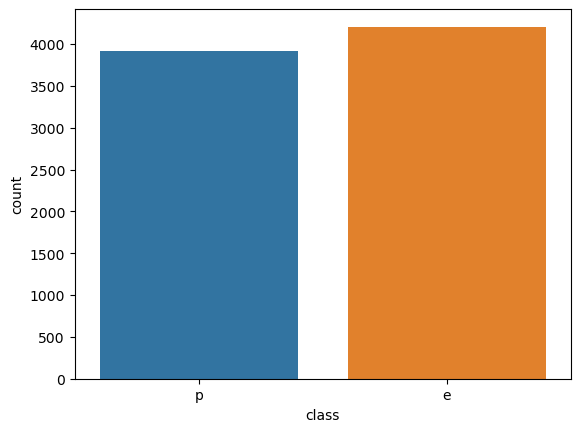

In [10]:
sns.countplot(data=df, x='class')

In [11]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
X = df.drop('class', axis=1)
y = df['class']


In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=9)

# Ada Model

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
model = AdaBoostClassifier(n_estimators=18)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=18)

In [48]:
mantar_pred = model.predict(X_test)

## Değerlendirme

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

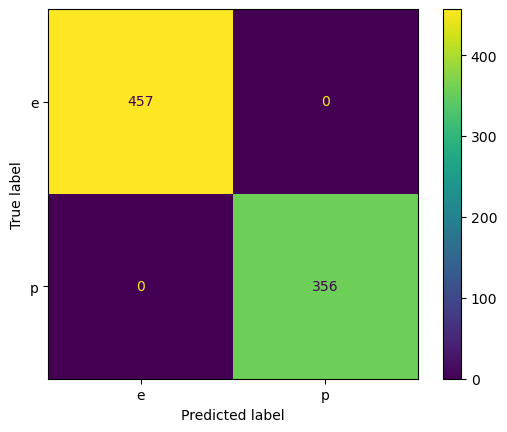

In [50]:
ConfusionMatrixDisplay.from_estimator(model, X_test,y_test)

In [51]:
print(classification_report(y_test, mantar_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [52]:
from sklearn.metrics import accuracy_score


In [53]:
hata_orani = []

for mantar_est in range(1,30):
    model = AdaBoostClassifier(n_estimators=mantar_est)
    model.fit(X_train,y_train)
    mantar_deneme_pred = model.predict(X_test)
    
    hata = 1 - accuracy_score(y_test, mantar_deneme_pred)
    hata_orani.append(hata)

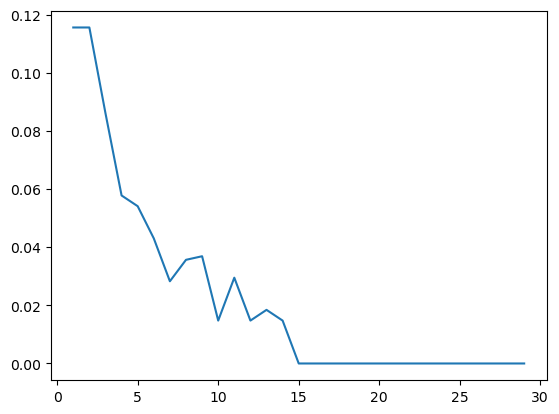

In [54]:
plt.plot(range(1,30), hata_orani)

In [55]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.        , 0.        , 0.06896552, 0.03448276, 0.        ,
       0.        , 0.        , 0.06896552, 0.10344828, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06896552, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06896552, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.        , 0.        , 0.     

In [56]:
feature_df = pd.DataFrame(index=X.columns, columns=['Katsayı'], data=model.feature_importances_)

In [57]:
feature_df = feature_df[feature_df['Katsayı'] > 0 ]
feature_df = feature_df.sort_values('Katsayı')
feature_df

,Katsayı
odor_c,0.034483
ring-type_p,0.034483
ring-number_t,0.034483
stalk-surface-above-ring_k,0.034483
stalk-surface-below-ring_y,0.034483
odor_p,0.034483
odor_f,0.034483
habitat_w,0.034483
stalk-shape_t,0.068966
population_v,0.068966


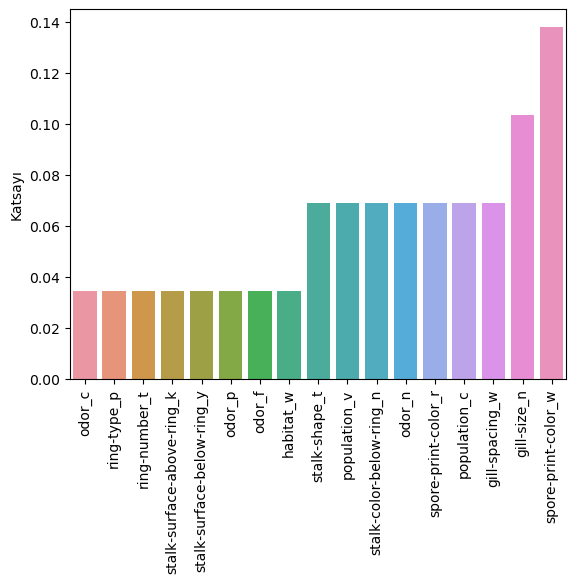

In [58]:
sns.barplot(x = feature_df.index, y = 'Katsayı', data=feature_df)
plt.xticks(rotation=90);

<Axes: xlabel='odor', ylabel='count'>

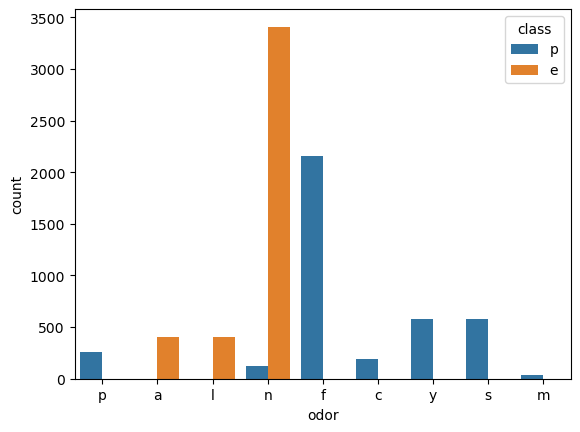

In [59]:
sns.countplot(x='odor', hue='class', data=df)

<Axes: xlabel='spore-print-color', ylabel='count'>

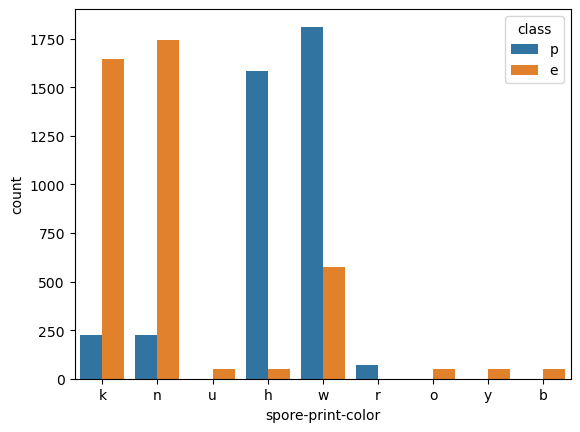

In [60]:
sns.countplot(x='spore-print-color', hue='class', data=df)